In [398]:
import pandas as pd
import numpy as np

df = pd.read_csv('sales_full_data.csv')
print(df.shape)

#dropping all rows with NaN data
df = df.dropna()

#removing rows with repeated headers
df1 = df.loc[df['Order ID'] == 'Order ID']
df = pd.concat([df, df1]).drop_duplicates(keep=False)
print(df.shape)

(186850, 6)
(185422, 6)


In [399]:
#calculating bill amount for each sale

convert_dict = {
    'Quantity Ordered': int,
    'Price Each': float
}

#converting datatype of 'Price Each' and 'Quantity Ordered'
df = df.astype(convert_dict)
print(df.dtypes)

#inserting bill_amt to dataframe
df.insert(4, 'bill_amt', df['Quantity Ordered'] * df['Price Each'])

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object


In [401]:
#creating list of cities for which sales are provided

addresses = df['Purchase Address'].apply(lambda x: x.split(', '))
cities = addresses.apply(lambda x: x[1])
df.insert(7, 'Cities', cities)
cities = list(set(cities))

print(cities)

['San Francisco', 'Dallas', 'Boston', 'Portland', 'Los Angeles', 'Austin', 'Seattle', 'Atlanta', 'New York City']


In [402]:
order_dates= df['Order Date'].apply(lambda x: x.split(" ")[0])

import re
order_months = order_dates.apply(lambda x: int(re.split('-|/', x)[0]))

df.insert(8, 'Month', order_months)

In [403]:
import matplotlib.pyplot as plt

#calculating total sales for each month across all branches
annual_sales = np.zeros(12)
sales_by_month = df.groupby('Month')
monthly_total = np.zeros(12)

for i in range(1, 13):
    monthly = sales_by_month.get_group(i)
    monthly_total[i-1] = monthly['bill_amt'].sum()



print(monthly_total)

[1820569.59 2198133.74 2802846.32 3387765.72 3148625.71 2574758.04
 2645146.88 2237698.86 2091371.25 3732828.84 3196146.9  4603148.06]


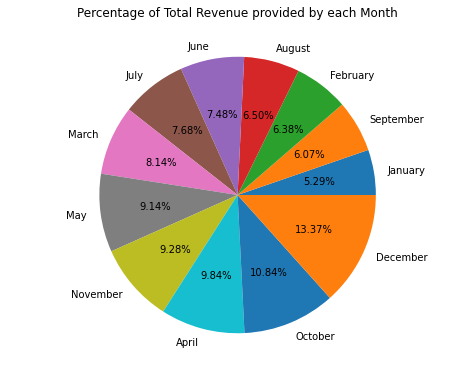

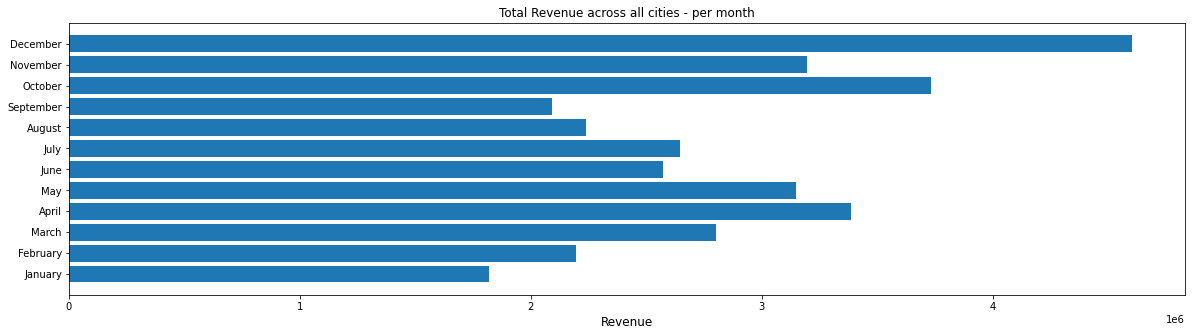

In [404]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']

monthly_rev = dict(zip(months, monthly_total))
monthly_rev = dict(sorted(monthly_rev.items(), key=lambda item: item[1])) #sorting months from highest to lowest sales

fig = plt.figure()
plt.rcParams["figure.figsize"] = (20,5)
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(monthly_rev.values(), labels=monthly_rev.keys(), autopct='%1.2f%%')
plt.title("Percentage of Total Revenue provided by each Month")
plt.show()

plt.barh(months, monthly_total)
plt.xlabel("Revenue")
plt.title('Total Revenue across all cities - per month')
plt.show()

From the graphs plotted above, we can conclude that the month which saw the highest sales is December and the month which had the lowest sales in the year was January.   
This can be attributed to the fact that December is the holiday season. With irresistible Black Friday deals on electronics and loads of families buying each other presents for Christmas, the month of December naturally saw the highest sales across all the cities.   
Since consumers have already spent a lot of money in the previous month, January sales take a hit and end up being the slowest month when it comes to sales.

### At what time of the day would you put out advertisements so that sales increase?
In my approach to answer this question, I considered the *number of times* a purchase had been made within a given hour.

In [405]:
#creating hour column
order_times= df['Order Date'].apply(lambda x: x.split(" ")[1])
order_hours = order_times.apply(lambda x: int(x.split(':')[0]))
df.insert(9, 'Hour', order_hours)

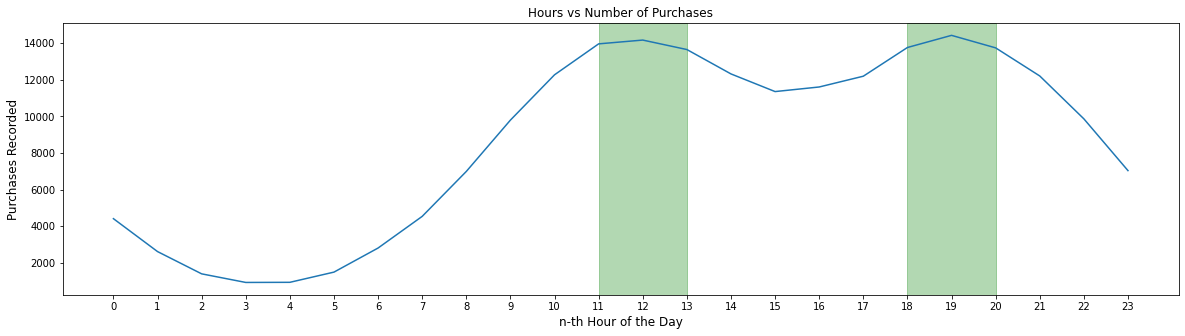

In [406]:
plt.rcParams["figure.figsize"] = (20,5)
#grouping entries by the hour of purchase
orders_by_hour = df.groupby('Hour')
hours = np.zeros(24)
time = np.arange(0, 24)

#
for i in range(0, 24):
    hours[i] = orders_by_hour.get_group(i)['Quantity Ordered'].sum()

hour_dict = dict(zip(time, hours))
hour_dict = dict(sorted(hour_dict.items(), key=lambda item: item[1]))
#print(hour_dict)

#print('Peak Hours thoughout the year: {}:00 - {}:00'.format(, hou[0]+1))

plt.plot(range(0,24), hours)
plt.axvspan(11, 13, color='green', alpha=0.3)
plt.axvspan(18, 20, color='green', alpha=0.3)
plt.xlabel('n-th Hour of the Day')
plt.ylabel('Purchases Recorded')
plt.xticks(range(0, 24))
plt.title('Hours vs Number of Purchases')

plt.show()

From the above graph, we can observe that maximum number of purchases are being made during the hours:   

### 11:00 to 13:00 hrs   

### 18:00 to 20:00 hrs
   
This indicates that footfall in the stores must be higher during these hours. Hence, if we choose to advertise aggressively in these peak hours, we can reach the maximum number of customers and boost sales considerably.

                                0
LG Dryer                      646
LG Washing Machine            666
Vareebadd Phone              2068
20in Monitor                 4123
ThinkPad Laptop              4126
Macbook Pro Laptop           4722
Flatscreen TV                4807
Google Phone                 5526
34in Ultrawide Monitor       6185
27in 4K Gaming Monitor       6234
iPhone                       6845
27in FHD Monitor             7532
Bose SoundSport Headphones  13403
Apple Airpods Headphones    15613
Wired Headphones            20491
Lightning Charging Cable    23121
USB-C Charging Cable        23887
AA Batteries (4-pack)       27595
AAA Batteries (4-pack)      30955


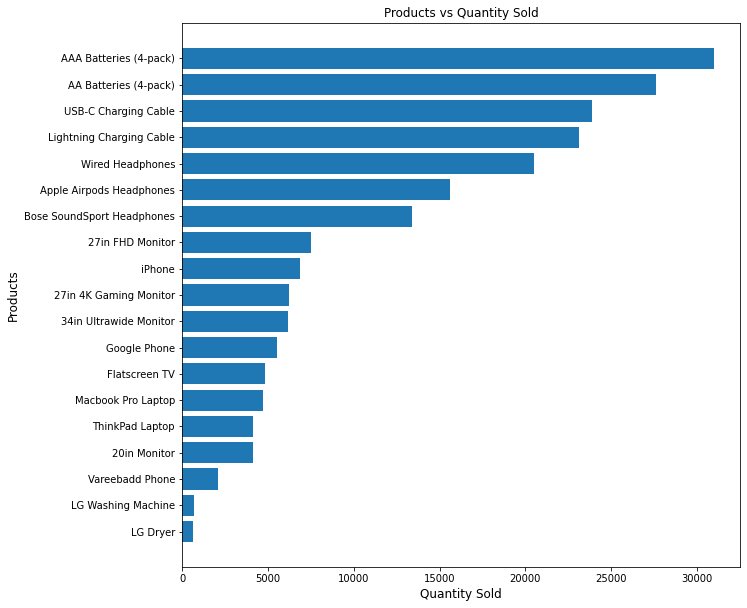

In [407]:
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.figsize"] = (10,10)

products = list(df['Product'].values)

products = list(set(products))
#print(products)

quantity = []
product_group = df.groupby('Product')

#calculating total number of products sold for each product
for product in products:
    product_df = product_group.get_group(product)
    quantity.append(product_df['Quantity Ordered'].sum())
    
prod_dict = dict(zip(products, quantity))
prod_dict = dict(sorted(prod_dict.items(), key=lambda item: item[1]))
print(pd.DataFrame.from_dict(prod_dict, orient='index'))

plt.barh(list(prod_dict.keys()), list(prod_dict.values()))
plt.xlabel('Quantity Sold')

plt.ylabel('Products')
plt.title('Products vs Quantity Sold')

plt.rcParams["figure.figsize"] = (2,1)
plt.show()

From the above plot, we can observe that the best selling products across all branches are:
### 1. AAA Batteries (4-pack): 30955 units
### 2. AA Batteries (4-pack): 27595 units
### 3. USB-C Charging Cable: 23887 units